# Temat testów
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od trudności zadania / pewności odpowiedzi?

In [1]:
from scipy import stats
import pandas as pd

from functions.tests import conduct_chi2test, create_contingency_table_two_variables, conduct_chi2test_for_many, make_decision
from functions.others import corr_answer_index
from functions.set_preparations import prepare_row

In [2]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud', 'Wynik', 'Trud_all']
)

a = df_answers[['1a_corr', '2a_corr', '3a_corr']]
b = df_answers[['1b_corr', '2b_corr', '3b_corr']]
df_answers['SumCorr_a'] = a.apply(lambda x: x.sum(), axis=1)
df_answers['SumCorr_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_answers[['1a_corr', '1b_corr']]
gr2 = df_answers[['2a_corr', '2b_corr']]
gr3 = df_answers[['3a_corr', '3b_corr']]
df_answers['SumCorr_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_answers['SumCorr_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_answers['SumCorr_3'] = gr3.apply(lambda x: x.sum(), axis=1)

a = df_answers[['1a_trud', '2a_trud', '3a_trud']]
b = df_answers[['1b_trud', '2b_trud', '3b_trud']]
df_answers['SumTrud_a'] = a.apply(lambda x: x.sum(), axis=1)
df_answers['SumTrud_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_answers[['1a_trud', '1b_trud']]
gr2 = df_answers[['2a_trud', '2b_trud']]
gr3 = df_answers[['3a_trud', '3b_trud']]
df_answers['SumTrud_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_answers['SumTrud_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_answers['SumTrud_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_answers.head()

,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Wynik,1a_corr,1b_corr,...,SumCorr_a,SumCorr_b,SumCorr_1,SumCorr_2,SumCorr_3,SumTrud_a,SumTrud_b,SumTrud_1,SumTrud_2,SumTrud_3
0,3,1,4,3,4,4,19,4,1,1,...,2,2,2,0,2,11,8,4,7,8
1,1,2,3,1,2,4,13,5,1,1,...,2,3,2,2,1,6,7,3,4,6
2,2,1,3,1,1,1,9,4,1,1,...,2,2,2,2,0,6,3,3,4,2
3,3,2,2,1,3,5,16,5,1,1,...,3,2,2,2,1,8,8,5,3,8
4,4,2,3,2,3,3,17,6,1,1,...,3,3,2,2,2,10,7,6,5,6


Do wniosków ogólnych (trud_popr_mean_max_min.csv):
- mean, min, max - trudność zadań
- mean - poprawność

In [3]:
result_df = pd.DataFrame({
    'mean': df_answers.mean(),
    'max': df_answers.max(),
    'min': df_answers.min()
})

result_df.to_csv('../results/t1/trud_popr_mean_max_min.csv', index=True)

### TESTY

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a poziomem trudności.

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a poziomem trudności.

**Poziom istotności:** $\alpha=0.05$

In [4]:
ALPHA = 0.05

#### Wynik ogólny vs. trudność ogólna

In [5]:
conduct_chi2test(df_answers, 'Wynik', 'Trud_all', ALPHA)

Trud_all  9   10  11  12  13  14  15  16  17  18  19  20  22
Wynik                                                       
0          0   0   0   0   0   0   0   0   1   0   0   0   0
2          0   0   1   1   0   1   0   0   0   0   0   0   0
3          0   1   2   0   1   1   0   1   1   0   0   0   1
4          1   1   0   0   1   2   0   0   0   0   1   2   0
5          0   2   0   1   3   1   2   2   0   0   2   1   0
6          0   0   0   0   0   1   1   2   1   2   0   0   0
Wartość statystyki chi-kwadrat: 66.13690476190477
P-value: 0.2733909221014005
Brak podstaw do odrzucenia H0.


#### Zsumowane grafiki A, B

In [7]:
conduct_chi2test(df_answers, 'SumCorr_a', 'SumTrud_a', ALPHA)
print('-------------------------')
conduct_chi2test(df_answers, 'SumCorr_b', 'SumTrud_b', ALPHA)

SumTrud_a  5   6   7   8   9   10  11  12
SumCorr_a                                
0           0   0   0   1   0   0   0   0
1           0   3   2   2   0   0   0   1
2           1   9   1   1   2   2   1   0
3           1   1   3   8   0   1   1   0
Wartość statystyki chi-kwadrat: 24.82829311211664
P-value: 0.2546774434684299
Brak podstaw do odrzucenia H0.
-------------------------
SumTrud_b  3   4   5   6   7   8   9   10  11  12
SumCorr_b                                        
0           0   0   0   0   0   0   1   0   0   0
1           0   1   2   2   0   1   0   0   0   0
2           1   1   3   0   4   7   0   3   1   1
3           0   2   0   1   4   2   2   2   0   0
Wartość statystyki chi-kwadrat: 34.98391330891331
P-value: 0.13927388720984155
Brak podstaw do odrzucenia H0.


#### Zsumowane grafiki 1,2,3

In [8]:
conduct_chi2test(df_answers, 'SumCorr_1', 'SumTrud_1', ALPHA)
print('-------------------------')
conduct_chi2test(df_answers, 'SumCorr_2', 'SumTrud_2', ALPHA)
print('-------------------------')
conduct_chi2test(df_answers, 'SumCorr_3', 'SumTrud_3', ALPHA)

SumTrud_1  2  3  4   5  6  7
SumCorr_1                   
0          0  0  0   2  0  0
1          0  1  2   1  0  0
2          4  6  6  12  4  3
Wartość statystyki chi-kwadrat: 7.166632653061224
P-value: 0.7096257398259604
Brak podstaw do odrzucenia H0.
-------------------------
SumTrud_2  2  3  4  5  6  7  8
SumCorr_2                     
0          0  0  2  1  1  2  2
1          0  0  4  0  2  1  0
2          3  9  6  4  2  2  0
Wartość statystyki chi-kwadrat: 21.998076923076926
P-value: 0.03754137284466776
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------
SumTrud_3  2  3  4  5  6  7  8  9
SumCorr_3                        
0          3  0  3  5  1  0  0  0
1          0  2  3  2  3  1  2  4
2          0  0  1  0  3  3  4  1
Wartość statystyki chi-kwadrat: 31.028022875816994
P-value: 0.005493653984322158
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


#### Wszystkie grafiki razem - zebranie danych do jednej kolumny

In [5]:
trud = []
for col in df_answers.columns.tolist():
    if col.endswith('trud'):
        trud.append(df_answers[col])

popr = []
for col in df_answers.columns.tolist():
    if col.endswith('corr'):
        popr.append(df_answers[col])
        
trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3   4  5
poprawnosc                   
0           12  24  19  13  4
1           40  60  44  25  5
Wartość statystyki chi-kwadrat: 2.456326584956349
P-value: 0.6524728942415814
Brak podstaw do odrzucenia H0.


Trudność: 1, Wskaźnik: 0.7
Trudność: 2, Wskaźnik: 0.6
Trudność: 3, Wskaźnik: 0.5681818181818182
Trudność: 4, Wskaźnik: 0.48
Trudność: 5, Wskaźnik: 0.2


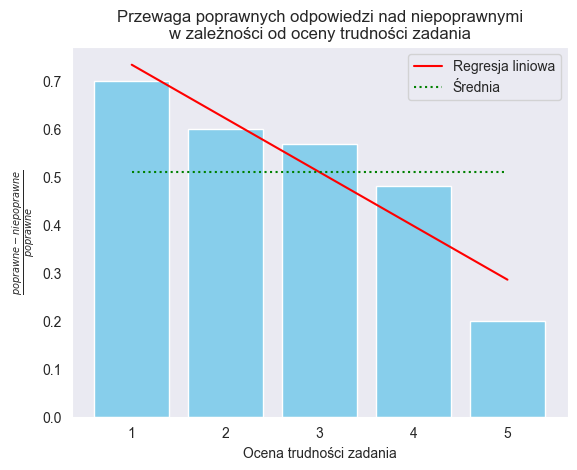

In [6]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

Stosunek $\frac{poprawneOdp - niepoprawneOdp}{poprawneOdp}$ zmniejsza się wraz ze wzrostem trudności (im wskaźnik jest mniejszy, tym większa jest równowaga poprawnych i niepoprawnych odpowiedzi, duża wartość wskaźnika pokazuje jak silna jest dominacja poprawnych odpowiedzi nad niepoprawnymi)

**Wniosek:** wraz ze wzrostem trudności zadania malała przewaga poprawnych odpowiedzi

#### Grafiki A - zagregowane do jednej kolumny

In [7]:
trud = [df_answers['1a_trud'], df_answers['2a_trud'], df_answers['3a_trud']]
popr = [df_answers['1a_corr'], df_answers['2a_corr'], df_answers['3a_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3   4  5
poprawnosc                   
0            7  13   7   8  1
1           15  30  28  12  2
Wartość statystyki chi-kwadrat: 2.6772980405498448
P-value: 0.6131929682247401
Brak podstaw do odrzucenia H0.


Trudność: 1, Wskaźnik: 0.5333333333333333
Trudność: 2, Wskaźnik: 0.5666666666666667
Trudność: 3, Wskaźnik: 0.75
Trudność: 4, Wskaźnik: 0.3333333333333333
Trudność: 5, Wskaźnik: 0.5


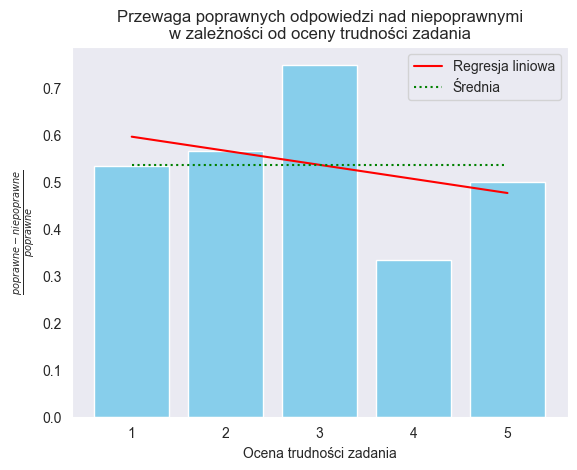

In [8]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

#### Grafiki B - zagregowane do jednej kolumny

In [9]:
trud = [df_answers['1b_trud'], df_answers['2b_trud'], df_answers['3b_trud']]
popr = [df_answers['1b_corr'], df_answers['2b_corr'], df_answers['3b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3   4  5
poprawnosc                   
0            5  11  12   5  3
1           25  30  16  13  3
Wartość statystyki chi-kwadrat: 6.181604634190842
P-value: 0.1859902175015663
Brak podstaw do odrzucenia H0.


Trudność: 1, Wskaźnik: 0.8
Trudność: 2, Wskaźnik: 0.6333333333333333
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.6153846153846154
Trudność: 5, Wskaźnik: 0.0


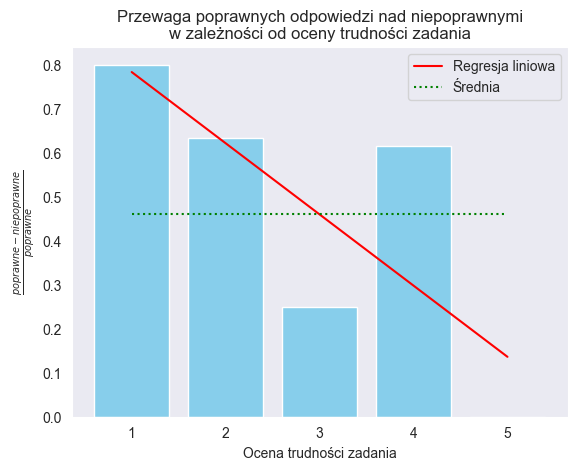

In [10]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

#### Grafiki 1,2,3 - zagregowane grupami do jednej kolumny

-> 1

In [11]:
trud = [df_answers['1a_trud'], df_answers['1b_trud']]
popr = [df_answers['1a_corr'], df_answers['1b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3  4  5
poprawnosc                  
0            2   4   2  0  0
1           18  29  20  6  1
Wartość statystyki chi-kwadrat: 0.9788288288288287
P-value: 0.9129890588754646
Brak podstaw do odrzucenia H0.


Trudność: 1, Wskaźnik: 0.8888888888888888
Trudność: 2, Wskaźnik: 0.8620689655172413
Trudność: 3, Wskaźnik: 0.9
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


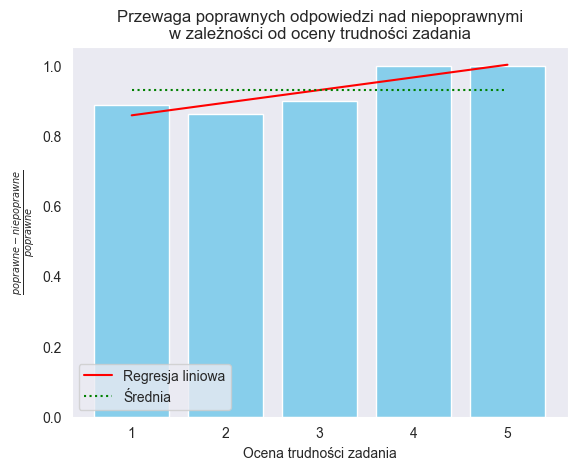

In [12]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

-> 2

In [13]:
trud = [df_answers['2a_trud'], df_answers['2b_trud']]
popr = [df_answers['2a_corr'], df_answers['2b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3  4  5
poprawnosc                  
0            0   7   7  7  2
1           21  24  11  3  0
Wartość statystyki chi-kwadrat: 23.544642805260395
P-value: 9.85406934660899e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.7083333333333334
Trudność: 3, Wskaźnik: 0.36363636363636365
Trudność: 4, Wskaźnik: -1.3333333333333333


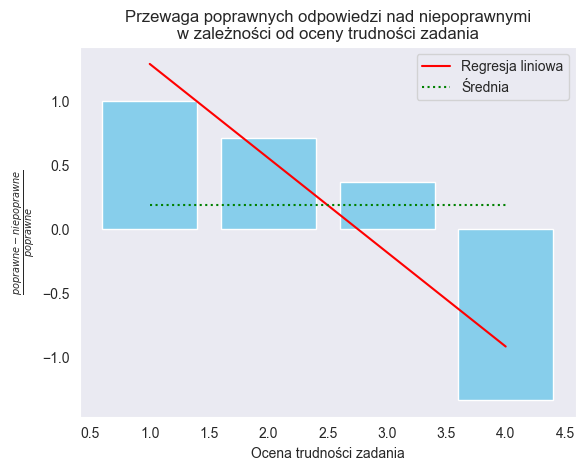

In [14]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

-> 3

In [15]:
trud = [df_answers['3a_trud'], df_answers['3b_trud']]
popr = [df_answers['3a_corr'], df_answers['3b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})

conduct_chi2test(df, 'poprawnosc', 'trudnosc', ALPHA)

trudnosc     1   2   3   4  5
poprawnosc                   
0           10  13  10   6  2
1            1   7  13  16  4
Wartość statystyki chi-kwadrat: 14.767061923583663
P-value: 0.005209550099435467
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


Trudność: 1, Wskaźnik: -9.0
Trudność: 2, Wskaźnik: -0.8571428571428571
Trudność: 3, Wskaźnik: 0.23076923076923078
Trudność: 4, Wskaźnik: 0.625
Trudność: 5, Wskaźnik: 0.5


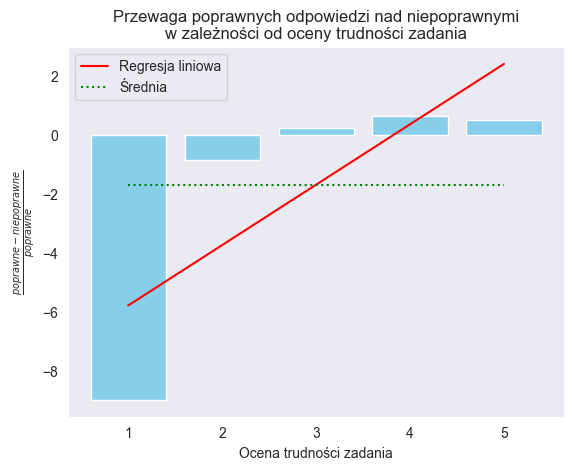

In [16]:
corr_answer_index(create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc'))

#### Poszczególne zadania 1a, 1b, 2a, 2b, 3a, 3b

In [17]:
df1a = pd.DataFrame({'poprawnosc': df_answers['1a_corr'], 'trudnosc': df_answers['1a_trud']})
df2a = pd.DataFrame({'poprawnosc': df_answers['2a_corr'], 'trudnosc': df_answers['2a_trud']})
df3a = pd.DataFrame({'poprawnosc': df_answers['3a_corr'], 'trudnosc': df_answers['3a_trud']})

df1b = pd.DataFrame({'poprawnosc': df_answers['1b_corr'], 'trudnosc': df_answers['1b_trud']})
df2b = pd.DataFrame({'poprawnosc': df_answers['2b_corr'], 'trudnosc': df_answers['2b_trud']})
df3b = pd.DataFrame({'poprawnosc': df_answers['3b_corr'], 'trudnosc': df_answers['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]

In [19]:
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [20]:
conduct_chi2test_for_many(dfs, ALPHA, names, 'poprawnosc', 'trudnosc')

-----------------------------------------------
1a:
trudnosc    1   2   3  4  5
poprawnosc                 
0           1   2   2  0  0
1           6  12  12  5  1
Wartość statystyki chi-kwadrat: 0.9761904761904759
P-value: 0.9133845441194299
Brak podstaw do odrzucenia H0.
-----------------------------------------------
1b:
trudnosc     1   2  3  4
poprawnosc              
0            1   2  0  0
1           12  17  8  1
Wartość statystyki chi-kwadrat: 1.00177569429647
P-value: 0.8008222909785573
Brak podstaw do odrzucenia H0.
-----------------------------------------------
2a:
trudnosc    1   2  3  4  5
poprawnosc                
0           0   2  4  5  1
1           8  14  7  0  0
Wartość statystyki chi-kwadrat: 20.25097962382445
P-value: 0.00044552777968950787
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------------------------------
2b:
trudnosc     1   2  3  4  5
poprawnosc                 
0            0   5  3  2  1
1           13  10  4  3  0

-------------------------------------
1a:
Trudność: 1, Wskaźnik: 0.8333333333333334
Trudność: 2, Wskaźnik: 0.8333333333333334
Trudność: 3, Wskaźnik: 0.8333333333333334
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


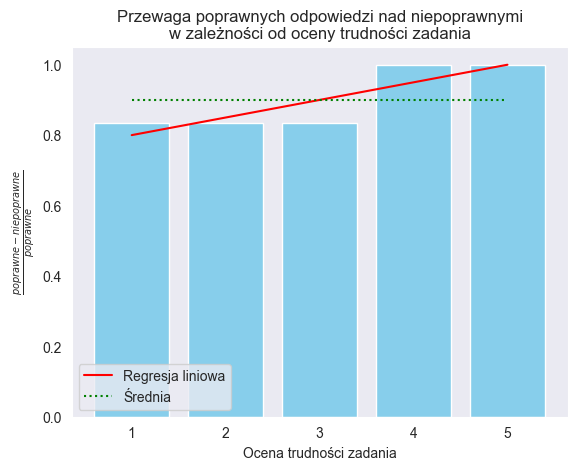

-------------------------------------
1b:
Trudność: 1, Wskaźnik: 0.9166666666666666
Trudność: 2, Wskaźnik: 0.8823529411764706
Trudność: 3, Wskaźnik: 1.0
Trudność: 4, Wskaźnik: 1.0


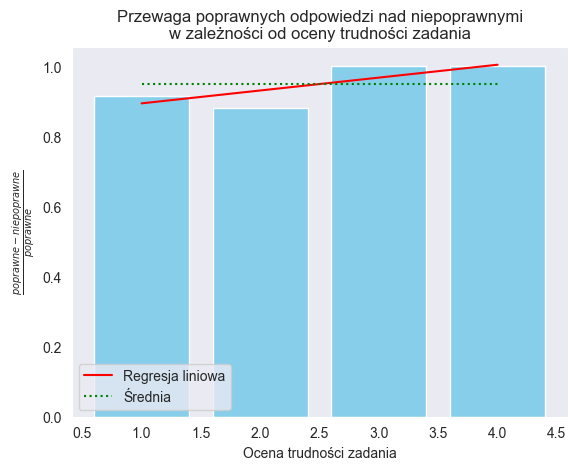

-------------------------------------
2a:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.8571428571428571
Trudność: 3, Wskaźnik: 0.42857142857142855


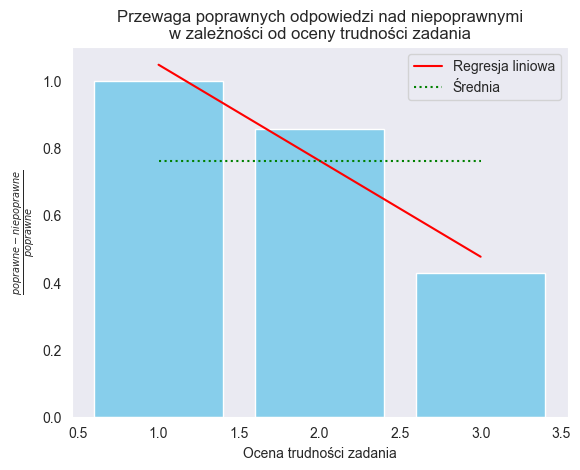

-------------------------------------
2b:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.5
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.3333333333333333


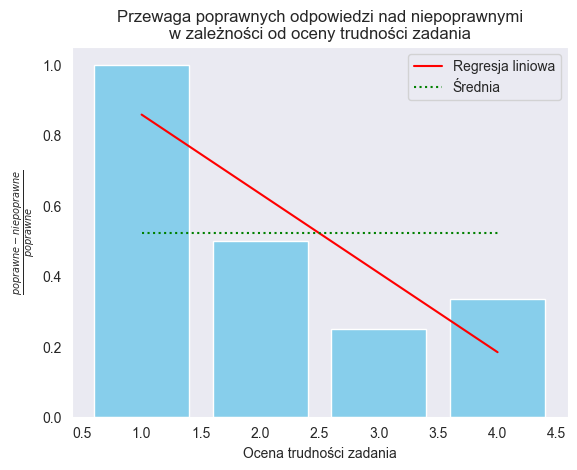

-------------------------------------
3a:
Trudność: 1, Wskaźnik: -5.0
Trudność: 2, Wskaźnik: -1.25
Trudność: 3, Wskaźnik: 0.8888888888888888
Trudność: 4, Wskaźnik: 0.5714285714285714
Trudność: 5, Wskaźnik: 1.0


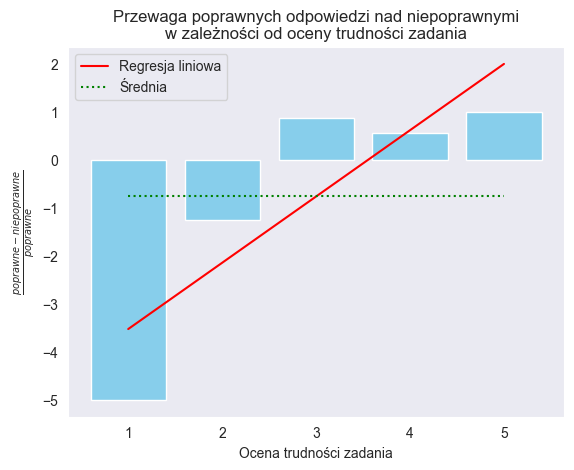

-------------------------------------
3b:
Trudność: 2, Wskaźnik: -0.3333333333333333
Trudność: 3, Wskaźnik: -1.25
Trudność: 4, Wskaźnik: 0.6666666666666666
Trudność: 5, Wskaźnik: 0.3333333333333333


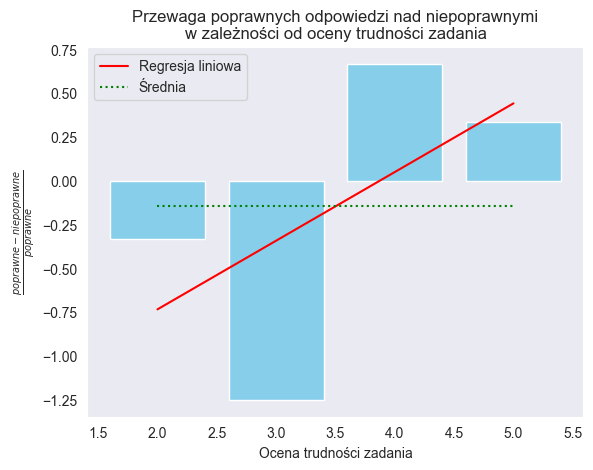

In [22]:
for i, df in enumerate(dfs):
    tab = create_contingency_table_two_variables(df, 'poprawnosc', 'trudnosc')
    print('-------------------------------------')
    print(names[i+1])
    corr_answer_index(tab)

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a poziomem trudności na poziomie istotności $\alpha=0.05$ dla:
- zsumowanych grafik: 2, 3
- grafik 2 (trend: poprawne ocenienie trudności)
- grafik 3 (trend: niedocenienie trudności zadania; oceniane jako łatwiejsze niż faktycznie było (stosunek (poprawnych-niepoprawnych)/poprawnych))
- grafiki 2a (trend: poprawne ocenienie trudności)
- grafiki 3a (trend: niedocenienie trudności zadania)


#### Test dla trzech grup 1 vs 2 vs 3

In [25]:
trud = [df_answers['1a_trud'], df_answers['1b_trud']]
popr = [df_answers['1a_corr'], df_answers['1b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)
df1 = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})
df1['Group'] = '1'

###
trud = [df_answers['2a_trud'], df_answers['2b_trud']]
popr = [df_answers['2a_corr'], df_answers['2b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)
df2 = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})
df2['Group'] = '2'

###
trud = [df_answers['3a_trud'], df_answers['3b_trud']]
popr = [df_answers['3a_corr'], df_answers['3b_corr']]

trud_row = prepare_row(trud)
popr_row = prepare_row(popr)
df3 = pd.DataFrame({'poprawnosc': popr_row, 'trudnosc': trud_row})
df3['Group'] = '3'

df = pd.concat([df1, df2, df3])
df.tail()

,poprawnosc,trudnosc,Group
77,1,2,3
78,0,3,3
79,0,3,3
80,0,2,3
81,0,3,3


In [26]:
observed_values = pd.crosstab([df['Group'], df['trudnosc']], df['poprawnosc']).values
observed_values

array([[ 2, 18],
       [ 4, 29],
       [ 2, 20],
       [ 0,  6],
       [ 0,  1],
       [ 0, 21],
       [ 7, 24],
       [ 7, 11],
       [ 7,  3],
       [ 2,  0],
       [10,  1],
       [13,  7],
       [10, 13],
       [ 6, 16],
       [ 2,  4]])

In [28]:
chi2, p, dof, expected = stats.chi2_contingency(observed_values)
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
make_decision(p, ALPHA)

Chi2: 73.36564514867038
P-value: 4.712980285189384e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


Istnieją istotne statystycznie różnice w poprawności w zależności od trudności dla trzech analizowanych grup.

In [29]:
# Export tabeli do wykresu poprawne vs. niepoprawne odpowiedzi per grafika
df_corr = pd.DataFrame(
    [df_answers['1a_corr'].value_counts(), df_answers['1b_corr'].value_counts(), df_answers['2a_corr'].value_counts(), df_answers['2b_corr'].value_counts(), df_answers['3a_corr'].value_counts(), df_answers['3b_corr'].value_counts(),
     ]
).rename(columns={1:'poprawna', 0: 'niepoprawna'})

df_corr

,poprawna,niepoprawna
1a_corr,36,5
1b_corr,38,3
2a_corr,29,12
2b_corr,30,11
3a_corr,22,19
3b_corr,19,22


In [22]:
df_corr.to_csv('../plots/poprawnosc_count.csv')